In [209]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [210]:
# Import data files
clinical_data = pd.read_csv('Data/clinicaltrial_data.csv')
mouse_data = pd.read_csv('Data/mouse_drug_data.csv')

In [211]:
# Clean mouse_data
# Mouse ID 'g989' is duplicated in mouse_data dataframe. Actual drug administered is unknown.
mouse_data.set_index('Mouse ID', inplace=True)
mouse_data.drop('g989', inplace=True)
mouse_data.reset_index(inplace=True)

In [212]:
# Merge dataframes
trial_data = pd.merge(clinical_data, mouse_data, on='Mouse ID')
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [213]:
# Tumor Response to Treatment

drug_results = trial_data[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug']]
drug_results.groupby(['Drug','Timepoint']).mean().head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [214]:
tumor_size_table = drug_results.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].mean().unstack()
tumor_size_table

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


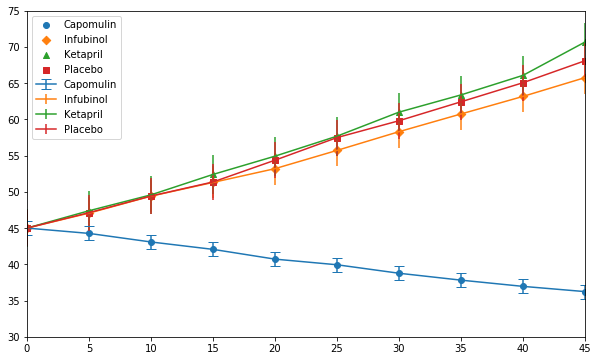

In [215]:
selected_tumor_size = tumor_size_table[['Capomulin','Infubinol','Ketapril','Placebo']]
x_axis = np.arange(0, 50, 5)
s_error = selected_tumor_size.sem()
plt.figure(figsize=(10,6))
plt.scatter(x_axis, selected_tumor_size['Capomulin'], marker='o')
plt.scatter(x_axis, selected_tumor_size['Infubinol'], marker='D')
plt.scatter(x_axis, selected_tumor_size['Ketapril'], marker='^')
plt.scatter(x_axis, selected_tumor_size['Placebo'], marker='s')

plt.errorbar(x_axis, selected_tumor_size['Capomulin'], yerr=s_error[0], capsize=5)
plt.errorbar(x_axis, selected_tumor_size['Infubinol'], yerr=s_error[1])
plt.errorbar(x_axis, selected_tumor_size['Ketapril'], yerr=s_error[2])
plt.errorbar(x_axis, selected_tumor_size['Placebo'], yerr=s_error[3])

plt.legend()
plt.xlim(0,45)
plt.ylim(30,75)
plt.show()

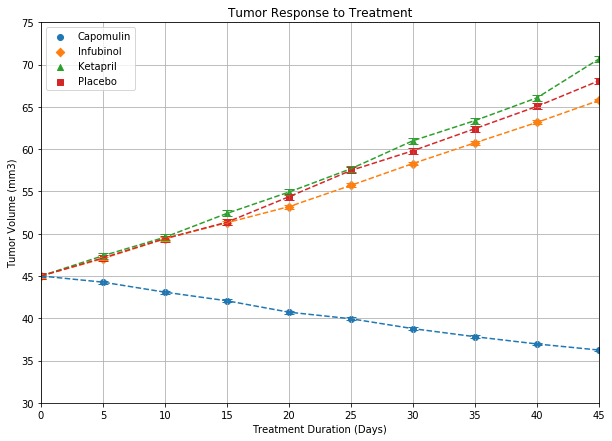

In [224]:
counter = 0
markers = ['o','D','^','s']
colors = ['blue','red','green','orange']

plt.figure(figsize=(10,7))

for column in selected_tumor_size:
    plt.scatter(x_axis, selected_tumor_size[column], marker=markers[counter])
    plt.errorbar(x_axis, selected_tumor_size[column], yerr=s_error[counter], capsize=5, fmt='--')
    counter = counter + 1
plt.xlim(0,45)
plt.ylim(30,75)
plt.title("Tumor Response to Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.show()

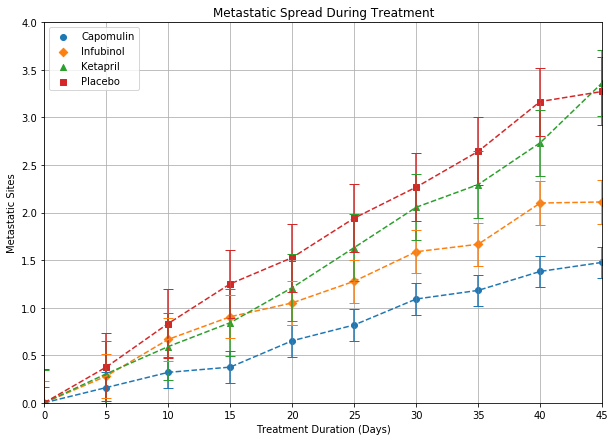

In [223]:
m_sites = trial_data.groupby(['Timepoint','Drug'])['Metastatic Sites'].mean().unstack()
m_sites_table = m_sites[['Capomulin','Infubinol','Ketapril','Placebo']]

counter = 0
markers = ['o','D','^','s']
colors = ['blue','red','green','orange']

x_axis = np.arange(0, 50, 5)
s_error = m_sites_table.sem()

plt.figure(figsize=(10,7))

for column in m_sites_table:
    plt.scatter(x_axis, m_sites_table[column], marker=markers[counter])
    plt.errorbar(x_axis, m_sites_table[column], yerr=s_error[counter], capsize=5, fmt='--')
    counter = counter + 1
plt.xlim(0,45)
plt.ylim(0,4.0)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.show()

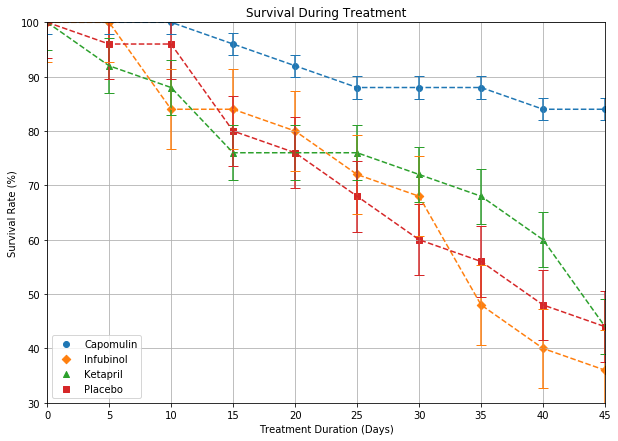

In [255]:
#mice_alive = trial_data.groupby(['Timepoint','Drug'])['Mouse ID'].count().unstack()
#mice_alive_table = mice_alive[['Capomulin','Infubinol','Ketapril','Placebo']]

mice_alive = trial_data.groupby(['Timepoint','Drug'])['Mouse ID'].count().unstack()
mice_alive_table = ((mice_alive[['Capomulin','Infubinol','Ketapril','Placebo']]/25)*100).astype(int)

counter = 0
markers = ['o','D','^','s']
colors = ['blue','red','green','orange']

x_axis = np.arange(0, 50, 5)
s_error = mice_alive_table.sem()

plt.figure(figsize=(10,7))

for column in m_sites_table:
    plt.scatter(x_axis, mice_alive_table[column], marker=markers[counter])
    plt.errorbar(x_axis, mice_alive_table[column], yerr=s_error[counter], capsize=5, fmt='--')
    counter = counter + 1
plt.xlim(0,45)
plt.ylim(30,100)
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.show()

In [248]:
mice_alive = trial_data.groupby(['Timepoint','Drug'])['Mouse ID'].count().unstack()
mice_alive_table = ((mice_alive[['Capomulin','Infubinol','Ketapril','Placebo']]/25)*100).astype(int)
mice_alive_table

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100,100,100,100
5,100,100,92,96
10,100,84,88,96
15,96,84,76,80
20,92,80,76,76
25,88,72,76,68
30,88,68,72,60
35,88,48,68,56
40,84,40,60,48


In [164]:
#drug_mean = trial_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().to_frame()
drug_mean = trial_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().to_frame().reset_index()
drug_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [159]:
drug_mean.xs('Capomulin').iloc[9,:]

Tumor Volume (mm3)    36.236114
Name: 45, dtype: float64

In [183]:
tester = drug_mean.loc[(drug_mean['Drug'] == 'Capomulin') & (drug_mean['Timepoint'] == 0), 'Tumor Volume (mm3)'].values[0]
tester

45.0

In [184]:
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
list0 = []
list45 = []

for x in range(4):
    list0.append(drug_mean.loc[(drug_mean['Drug'] == drugs[x]) & (drug_mean['Timepoint'] == 0), 'Tumor Volume (mm3)'].values[0])
    list45.append(drug_mean.loc[(drug_mean['Drug'] == drugs[x]) & (drug_mean['Timepoint'] == 45), 'Tumor Volume (mm3)'].values[0])

print(list0)
print(list45)

[45.0, 45.0, 45.0, 45.0]
[36.236113799447629, 65.755562277533329, 70.662957608972718, 68.084082217418185]


In [ ]:
# Percent change: (New - Old)/Old * 100